In [7]:
import numpy as np
import math
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

# HW4


## Viterbi Implementation

This homework we'll be focusing on Viterbi Algorithm given an existing HMM. The goal of the homework is to find the likelihood of an utterance and the best   state sequence.

* The observed features are 14-dimensional, real-valued speech features, from utterances of “yes”    and “no” sampled every 10 msec. In other words, each input line is a spe
ech sample, 10 msec apart. (See the `input\*.txt` files.)

* Parameters (mean and variance vectors) of two “yes” and “no” GMMs are given . (See the `(mean|var)_\*.txt` files.)

* Transition probabilities of  “yes” and “no” HMMs are given. Each row is the transition probability for one state. For example, row 1 colum 3 is the transition probability from state 1 to state 3 (See the `trans_\*.txt` files.)

* Assume equal initial probabilities.

* Assume that this is a whole-word recognizer, and that each word is recognized with a separate execution of the program. This will greatly simplify the implementation.

* The transition probabilities <font color=red>are</font> in the log domain.

* The mixture weights <font color=red>are NOT</font> in the log domain.

* The covariance values <font color=red>are NOT </font>in the log domain. These covariance values are the diagonal of a 14 by 14 matrix.

* <font color=red> The natural log (e) is used when computing log values. </font>

* Your state sequence plot should look like to stateSeq.pdf.






### What to turn in:

1. Print out final likelihood scores and plot most likely state sequences for:

        A) `input1.txt` given `hmm_yes`

        B) `input1.txt` given `hmm_no`

        C) `input2.txt` given `hmm_yes`

        D) `input2.txt` given `hmm_no`

        E) `input3.txt` given `hmm_yes`

        F) `input3.txt` given `hmm_no`

2. Use results to perform ASR…

    A) is input1.txt more likely to be “yes” or “no”?

    B) is input2.txt more likely to be “yes” or “no”?

    C) is input3.txt more likely to be “yes” or “no”?


Tip: Start small! This way you can always do some "by hand" calculations to verify what your code is doing.

Tip: Don't forget about underflow! For this part of the assignment, it won't be a serious issue, but for the next part, it will be, so code accordingly. If you want, start with real-space probabilities, get things working that way, and then switch to log-probs.

Tip: As you follow along with the algorithm from the book (or from the slides), do watch out for off-by-one errors. The book assumes 1-based indexing, whereas Python starts at 0.

b_j_ot = state observation likelihood of observation ot, given state j.
CALCULATED from observations, mean, var

a_ij = transition probability from qi(previous) to qj (Current state)
GIVEN in trans_yes.txt, trans_no.txt

v_(t-1)_i = previous Viterbi path probability

for state qj @ time t...
v_t_j = max(i= 1:N) of ( v_(t-1)_i * a_ij * b_j_ot )

In [92]:
in_txt = "input1.txt"
mean_txt = "mean_YES.txt"
var_txt = "var_YES.txt"
trans_txt = "trans_YES.txt"

obs= []
means = []
covars = []
trans = []

with open(in_txt) as f:
    obs = [[float(num) for num in line.replace('\n', ',').replace(' ', ',').split(',') if num != ""] for line in f]
obs= np.array(obs)
    
with open(mean_txt) as f:
    means = [[float(num) for num in line.replace('\n', ',').replace(' ', ',').split(',') if num != ""] for line in f]
means = np.array(means)

with open(var_txt) as f:
    covars = [[float(num) for num in line.replace('\n', ',').replace(' ', ',').split(',') if num != ""] for line in f]
covars= np.array(covars)

with open(trans_txt) as f:
    trans = [[float(num) for num in line.replace('\n', ',').replace(' ', ',').split(',') if num != ""] for line in f]
trans= np.array(trans)
#var_arr[:, 0]

def multivar(x, m, c):
    """
    x: input, single row observation, columns = elements of obs
    m: mean
    c: covar
    """
    
    return multivariate_normal.logpdf(x, m, c)

test = [1,2,3,5]
testmax = max(enumerate(test), key=lambda x: x[1])[1]
testargmax = max(enumerate(test), key=lambda x: x[1])[0]
print(testmax,testargmax)


5 3


In [124]:
def Viterbi(obsfile, word):
#Input Files -> Arrays
    in_txt = obsfile#"input1.txt"
    mean_txt = "mean_"+word+".txt"
    var_txt = "var_"+word+".txt"
    trans_txt = "trans_"+word+".txt"

    obs= []
    means = []
    covars = []
    trans = []

    with open(in_txt) as f:
        obs = [[float(num) for num in line.replace('\n', ',').replace(' ', ',').split(',') if num != ""] for line in f]
    obs= np.array(obs)

    with open(mean_txt) as f:
        means = [[float(num) for num in line.replace('\n', ',').replace(' ', ',').split(',') if num != ""] for line in f]
    means = np.array(means)

    with open(var_txt) as f:
        covars = [[float(num) for num in line.replace('\n', ',').replace(' ', ',').split(',') if num != ""] for line in f]
    covars= np.array(covars)

    with open(trans_txt) as f:
        trans = [[float(num) for num in line.replace('\n', ',').replace(' ', ',').split(',') if num != ""] for line in f]
    trans= np.array(trans)

#Initialization
    snum = len(means[0,:]) #num states
    #print(snum)
    vprob = [[0 for i in range(0, snum)]]
    vstates = [[0 for i in range (0, snum)]]
    #print((vprob))

#Compute
    for i in range(0, len(obs)): #Iterate thru observations
        obs_i = obs[i, :]
        new_vprob = []
        new_vstates = []
        for j in range (0, snum): #Iterate through states
            tempmax = [] #snum size array of possible probs
            b = multivar(obs_i, means[:, j], covars[:, j])
            for k in range (0, snum): #Iterate through previous states
                p_kj = vprob[i][k] + trans[k,j] + b
                tempmax.append(p_kj)
            curmax = max(enumerate(tempmax), key=lambda x: x[1])[1]
            curargmax = max(enumerate(tempmax), key=lambda x: x[1])[0] + 1 #add one for 0 indexing -> states
            new_vprob.append(curmax)
            new_vstates.append(curargmax)
        vprob.append(new_vprob)
        vstates.append(new_vstates)
            
#Backtrace
    ret = []
    final_p = vprob[len(vprob)-1]
    start_bt = max(enumerate(final_p), key=lambda x: x[1])[0] + 1
    ret.append(start_bt)
    cur_bt = start_bt
    
    for i in range(len(obs), 0, -1):
        cur_bt = vstates[i][cur_bt -1]
        ret.append(cur_bt)
        
    #print(vstates)
    return (max(final_p), ret[::-1])


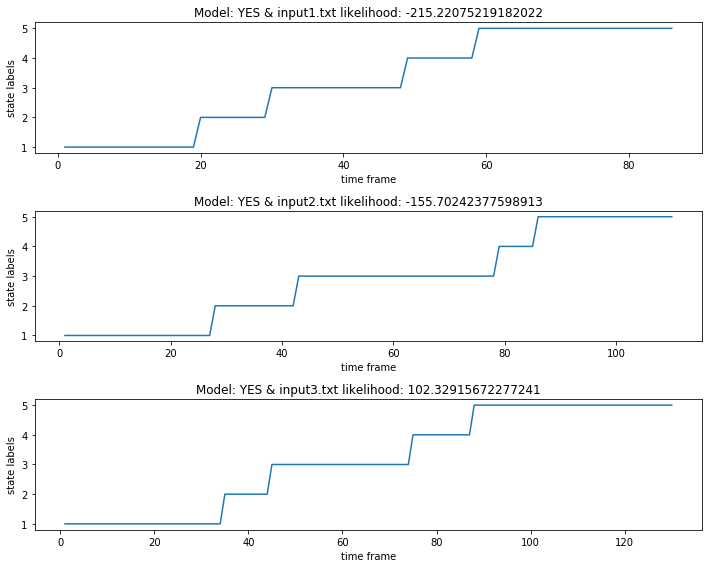

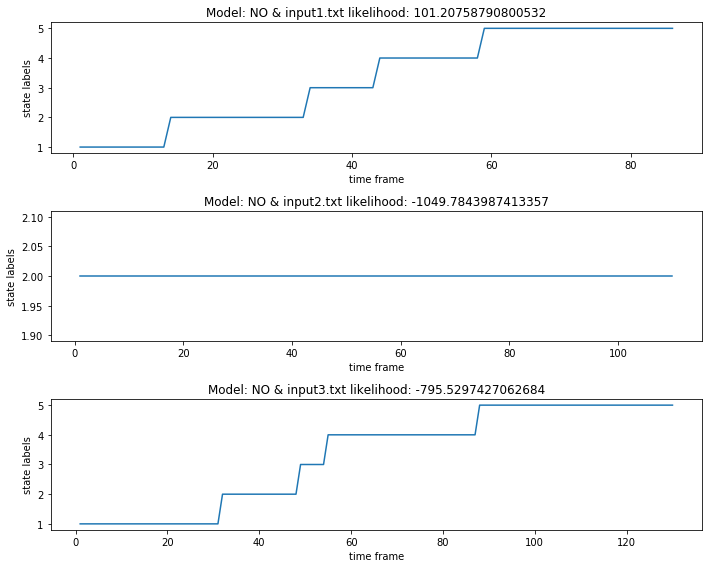

In [159]:
######### YES #################################################
fig = plt.figure(figsize=(10,8))
fname = "input1.txt"
wordin = "YES"
likelihood, states = Viterbi(fname, wordin)
title = "Model: "+ wordin + " & "+fname+" likelihood: " + str(likelihood)

plt.subplot(3, 1, 1)
plt.plot(range(1,len(states)+1),states)
plt.title(title)
plt.xlabel("time frame")
plt.ylabel("state labels")

fname = "input2.txt"
likelihood, states = Viterbi(fname, wordin)
title = "Model: "+ wordin + " & "+fname+" likelihood: " + str(likelihood)

plt.subplot(3, 1, 2)
plt.plot(range(1,len(states)+1),states)
plt.title(title)
plt.xlabel("time frame")
plt.ylabel("state labels")

fname = "input3.txt"
likelihood, states = Viterbi(fname, wordin)
title = "Model: "+ wordin + " & "+fname+" likelihood: " + str(likelihood)

plt.subplot(3, 1, 3)
plt.plot(range(1,len(states)+1),states)
plt.title(title)
plt.xlabel("time frame")
plt.ylabel("state labels")

plt.tight_layout()
plt.show()

######### NO #################################################
fig2 = plt.figure(figsize=(10,8))
fname = "input1.txt"
wordin = "NO"
likelihood, states = Viterbi(fname, wordin)
title = "Model: "+ wordin + " & "+fname+" likelihood: " + str(likelihood)

plt.subplot(3, 1, 1)
plt.plot(range(1,len(states)+1),states)
plt.title(title)
plt.xlabel("time frame")
plt.ylabel("state labels")

fname = "input2.txt"
likelihood, states = Viterbi(fname, wordin)
title = "Model: "+ wordin + " & "+fname+" likelihood: " + str(likelihood)

plt.subplot(3, 1, 2)
plt.plot(range(1,len(states)+1),states)
plt.title(title)
plt.xlabel("time frame")
plt.ylabel("state labels")

fname = "input3.txt"
likelihood, states = Viterbi(fname, wordin)
title = "Model: "+ wordin + " & "+fname+" likelihood: " + str(likelihood)

plt.subplot(3, 1, 3)
plt.plot(range(1,len(states)+1),states)
plt.title(title)
plt.xlabel("time frame")
plt.ylabel("state labels")

plt.tight_layout()
plt.show(fig2)

Using results to perform ASR…

A) is input1.txt more likely to be “yes” or “no”?

**Input 1 is more likely to be "NO", as the likelihood for NO is higher. 100 >> -215**

B) is input2.txt more likely to be “yes” or “no”?

**Input 2 is more likely to be "YES", as the likelihood for YES is higher. -155 > -1049. HOWEVER, neither YES nor NO have high (~100) likelihoods like the other two samples, so it should be neither (just with YES favored over NO)**

C) is input3.txt more likely to be “yes” or “no”?

**Input 1 is more likely to be "YES", as the likelihood for YES is higher. 102 >> -785**

<font color=red> self-assessment: </font>